<a href="https://colab.research.google.com/github/mong-pnh/DS24-CoderSchool2020/blob/master/Copy_3_of_Team_4_TED_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [ ]:
# Start your codes here!

# Set up

In [4]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import files
data_to_load = files.upload()

Saving ted.csv to ted.csv


In [8]:
ted = pd.read_csv('ted.csv',engine='python', error_bad_lines=False)

#Overall

In [9]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [10]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [11]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [12]:
ted.corr()
# speakable numbers: 0.530939 (views and comments), 0.902565 (film_date, published_date), 0.377623 (views and languages)

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


In [13]:
ted.shape

(2550, 17)

In [14]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


# [Speaker]

In [15]:
# The number of main speakers
ted['main_speaker'].nunique()

2156

In [16]:
# The number of their jobs 
ted['speaker_occupation'].nunique()

1458

In [17]:
# Talk with the biggest number of speakers
ted[ted['num_speaker'] == ted['num_speaker'].max()][['title', 'description', 'main_speaker', 'event','num_speaker']]

,title,description,main_speaker,event,num_speaker
2507,A dance to honor Mother Earth,Movement artists Jon Boogz and Lil Buck debut ...,Jon Boogz and Lil Buck,TED2017,5


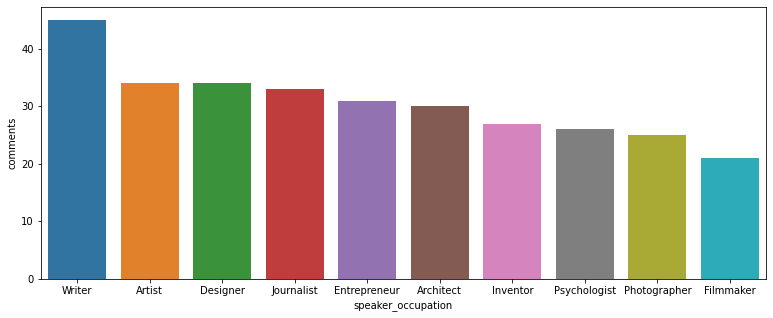

In [26]:
# Top of comments by speaker's occupation
occupation_ted = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']].sort_values('comments', ascending=False)
plt.figure(figsize=(13,5))
sns.barplot(x='speaker_occupation', y='comments', data=occupation_ted.head(10))
plt.show()

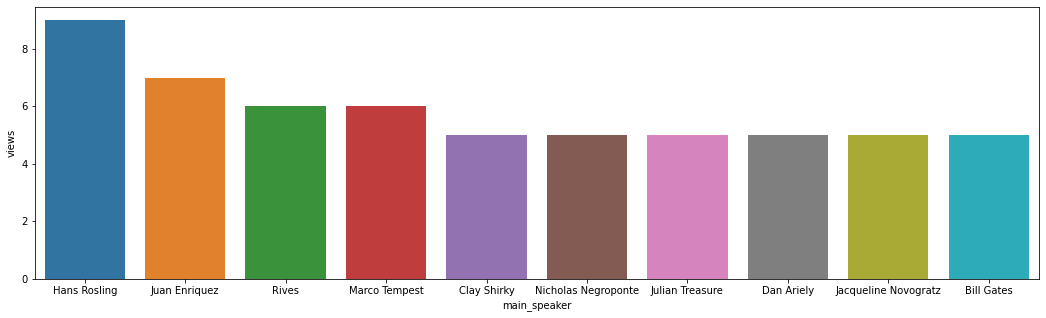

In [24]:
# Top of views by speaker's occupation
view_ted = ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'views']].sort_values('views', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='main_speaker', y='views', data=view_ted.head(10))
plt.show()

In [31]:
ted[['title', 'main_speaker', 'views']].sort_values('views', ascending=False)[:15]

,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1346,Your body language may shape who you are,Amy Cuddy,43155405
677,How great leaders inspire action,Simon Sinek,34309432
837,The power of vulnerability,Brené Brown,31168150
452,10 things you didn't know about orgasm,Mary Roach,22270883
1776,How to speak so that people want to listen,Julian Treasure,21594632
201,My stroke of insight,Jill Bolte Taylor,21190883
5,Why we do what we do,Tony Robbins,20685401
2114,This is what happens when you reply to spam email,James Veitch,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465


In [34]:
# Some speakers have high-viewed title but their appearances is smalls --> smaller views overall  
# Look at some speaker's appearances
ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']].sort_values('comments', ascending=False).head(10)

,main_speaker,comments
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


In [35]:
# Quick check
ted[ted['main_speaker']=='Hans Rosling'][['title', 'main_speaker', 'views']]

,title,main_speaker,views
4,The best stats you've ever seen,Hans Rosling,12005869
117,New insights on poverty,Hans Rosling,3243784
447,"Insights on HIV, in stunning data visuals",Hans Rosling,904813
502,Let my dataset change your mindset,Hans Rosling,1471039
558,Asia's rise -- how and when,Hans Rosling,1738069
726,"Global population growth, box by box",Hans Rosling,2934262
784,The good news of the decade? We're winning the...,Hans Rosling,738895
893,The magic washing machine,Hans Rosling,2391977
1239,Religions and babies,Hans Rosling,2138419


# [Views, comments, duration, languages]

In [27]:
# List of event and its number of talks
ted[['title', 'event']].groupby('event').count().reset_index().sort_values('title', ascending=False).head(10)

,event,title
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


In [36]:
# Talk with the biggest number of languages in subtitles
ted[ted['languages'] == ted['languages'].max()][['title', 'description', 'main_speaker', 'event','num_speaker','languages']]
# Many people do care about self-study

,title,description,main_speaker,event,num_speaker,languages
973,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,TED2011,1,72


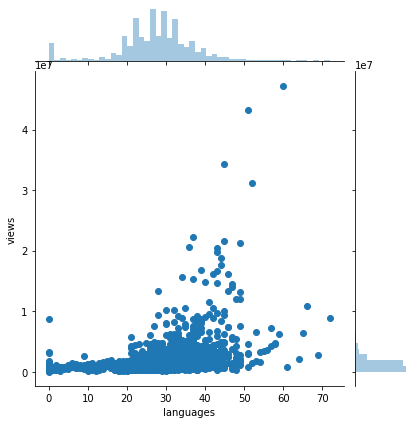

In [37]:
# A video with about 30-50 languages of subtitles has a higher views
sns.jointplot(x='languages', y='views', data=ted)
plt.show()

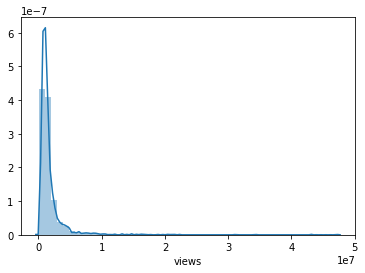

In [38]:
# Look at views distribution
sns.distplot(ted['views'])

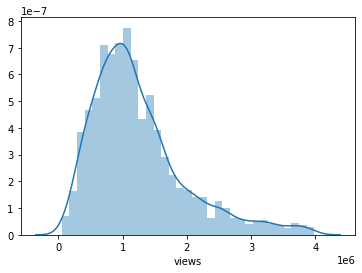

In [40]:
# Zoom in the crowded
sns.distplot(ted[ted['views'] < 0.4e7]['views'])

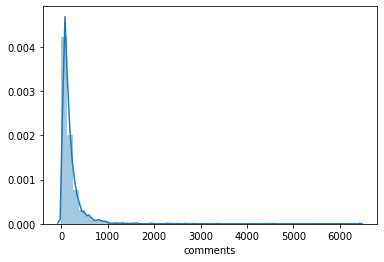

In [41]:
# Do the same for comments
sns.distplot(ted['comments'])

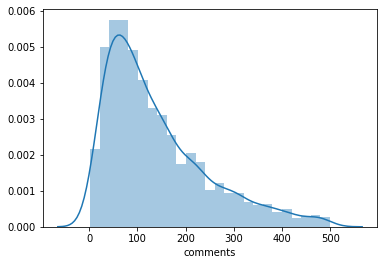

In [42]:
# Do the same for comments
sns.distplot(ted[ted['comments'] < 500]['comments'])

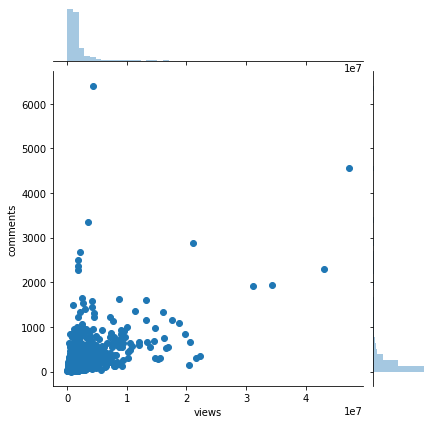

In [43]:
# Watch their correlation
sns.jointplot(x='views', y='comments', data=ted)

In [44]:
ted[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [45]:
# A mean for a video is about 14 minutes
ted['duration'] = ted['duration']/60
ted['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

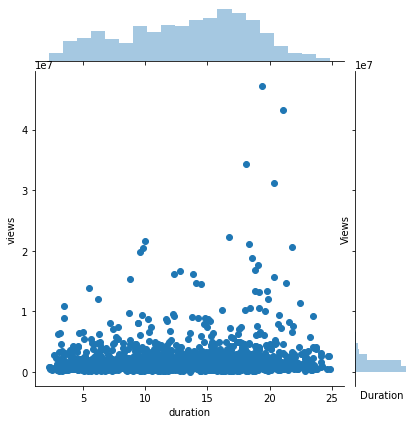

In [46]:
# Duration is not classified by views
sns.jointplot(x='duration', y='views', data=ted[ted['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

# [Content] The ratings, related_talks, tags column are in dictionary format. How should we handle them? 

## Try

In [47]:
ted['ratings'][1]
# String type

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [48]:
ted['related_talks'][1]
# Let's expand a cell and try to access some link
# String type

'[{\'id\': 243, \'hero\': \'https://pe.tedcdn.com/images/ted/566c14767bd62c5ff760e483c5b16cd2753328cd_2880x1620.jpg\', \'speaker\': \'Al Gore\', \'title\': \'New thinking on the climate crisis\', \'duration\': 1674, \'slug\': \'al_gore_s_new_thinking_on_the_climate_crisis\', \'viewed_count\': 1751408}, {\'id\': 547, \'hero\': \'https://pe.tedcdn.com/images/ted/89288_800x600.jpg\', \'speaker\': \'Ray Anderson\', \'title\': \'The business logic of sustainability\', \'duration\': 954, \'slug\': \'ray_anderson_on_the_business_logic_of_sustainability\', \'viewed_count\': 881833}, {\'id\': 2093, \'hero\': \'https://pe.tedcdn.com/images/ted/146d88845861cbf768bbf8bec8b2e41f8bfc7903_2400x1800.jpg\', \'speaker\': \'Lord Nicholas Stern\', \'title\': \'The state of the climate — and what we might do about it\', \'duration\': 993, \'slug\': \'lord_nicholas_stern_the_state_of_the_climate_and_what_we_might_do_about_it\', \'viewed_count\': 773779}, {\'id\': 2784, \'hero\': \'https://pe.tedcdn.com/imag

In [49]:
ted['tags'][1]
# String type

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

## Observation
- The 'id', 'name' is unique and unstable; the 'count' is varying.
- Make a new tables with the 'ID', 'name' and 'count' in ratings
- Fix problems in formating the column 'related_talks'
- Convert string into dict, list type

## Next steps
- List all the tags
- Discovery the relationship between talks
- Understand the ratings and its components' meanings

In [50]:
import ast

## Ratings

In [51]:
ted['ratings'] = ted['ratings'].apply(lambda x: ast.literal_eval(str(x)))

In [52]:
# Extract some names in ratings
ted['funny'] = ted['ratings'].apply(lambda x: x[0]['count'])
ted['jawdrop'] = ted['ratings'].apply(lambda x: x[-3]['count'])
ted['beautiful'] = ted['ratings'].apply(lambda x: x[3]['count'])
ted['confusing'] = ted['ratings'].apply(lambda x: x[2]['count'])
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,funny,jawdrop,beautiful,confusing
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,19645,1174,3253,6073
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,544,116,58,62
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,964,230,60,183
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,760,230,59,32
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,3202,2542,318,942


In [73]:
ted[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:10]

,title,main_speaker,views,published_date,funny
837,The power of vulnerability,Brené Brown,31168150,1970-01-01,21444
0,Do schools kill creativity?,Ken Robinson,47227110,1970-01-01,19645
1030,How to live before you die,Steve Jobs,8744428,1970-01-01,17290
201,My stroke of insight,Jill Bolte Taylor,21190883,1970-01-01,14447
1129,The happy secret to better work,Shawn Achor,16209727,1970-01-01,11213
1940,The price of shame,Monica Lewinsky,11443190,1970-01-01,8668
2109,What makes a good life? Lessons from the longe...,Robert Waldinger,16601927,1970-01-01,8590
1747,Why good leaders make you feel safe,Simon Sinek,6803938,1970-01-01,8569
553,The thrilling potential of SixthSense technology,Pranav Mistry,16097077,1970-01-01,8416
176,Underwater astonishments,David Gallo,13926113,1970-01-01,8328


## Related_talks 

In [ ]:
# There's something wrong with these below code
ted['related_talks'] = ted['related_talks'].apply(lambda x: ast.literal_eval(x))

In [86]:
s = ted.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [ ]:
related_ted = ted.drop('related_talks', axis=1).join(s)
related_ted['title', 'main_speaker','views', 'comments','related'].head(10)

## Tags

In [77]:
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(str(x)))

In [78]:
s = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [79]:
theme_ted = ted.drop('tags', axis=1).join(s)
theme_ted[['title', 'main_speaker','views', 'comments','theme']].head(10)

,title,main_speaker,views,comments,theme
0,Do schools kill creativity?,Ken Robinson,47227110,4553,children
0,Do schools kill creativity?,Ken Robinson,47227110,4553,creativity
0,Do schools kill creativity?,Ken Robinson,47227110,4553,culture
0,Do schools kill creativity?,Ken Robinson,47227110,4553,dance
0,Do schools kill creativity?,Ken Robinson,47227110,4553,education
0,Do schools kill creativity?,Ken Robinson,47227110,4553,parenting
0,Do schools kill creativity?,Ken Robinson,47227110,4553,teaching
1,Averting the climate crisis,Al Gore,3200520,265,alternative energy
1,Averting the climate crisis,Al Gore,3200520,265,cars
1,Averting the climate crisis,Al Gore,3200520,265,climate change


In [97]:
theme_ted['theme'].value_counts()

technology       727
science          567
global issues    501
culture          486
TEDx             450
                ... 
evil               2
testing            1
funny              1
cloud              1
skateboarding      1
Name: theme, Length: 416, dtype: int64

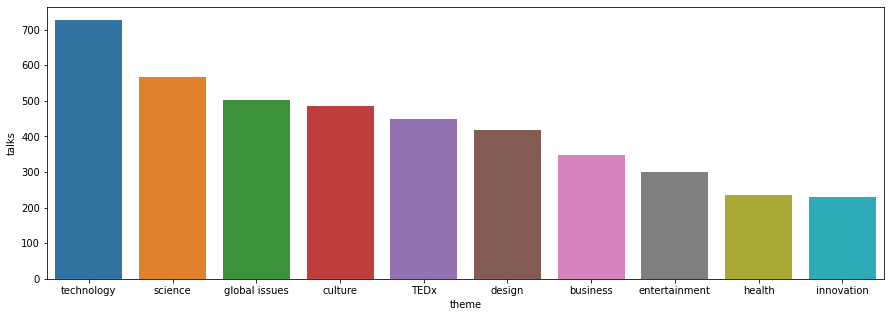

In [98]:
pop_themes = theme_ted['theme'].value_counts().reset_index()
pop_themes.columns = ['theme', 'talks']
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

# [Time] Can you find the year of the talks?

## Try

In [65]:
# Guess: The year is relevant to 'event','film_date','published_date'
ted[['event','film_date','published_date']]
# Look at the table: The name of the event might spoil the year of the talks, except "TEDxBeaconStreet"	

,event,film_date,published_date
0,TED2006,1140825600,1151367060
1,TED2006,1140825600,1151367060
2,TED2006,1140739200,1151367060
3,TED2006,1140912000,1151367060
4,TED2006,1140566400,1151440680
...,...,...,...
2545,TED2017,1496707200,1505851216
2546,TED2017,1492992000,1505919737
2547,TED2017,1492992000,1506006095
2548,TEDxMileHigh,1499472000,1506024042


In [66]:
# Use value_counts() function to returns object containing: counts of unique values & in descending 
ted['event'].value_counts()

TED2014                   84
TED2009                   83
TED2013                   77
TED2016                   77
TED2015                   75
                          ..
New York State Senate      1
TEDxBoston 2010            1
TEDxConcordiaUPortland     1
TEDxCannes                 1
TEDxGeorgetown             1
Name: event, Length: 355, dtype: int64

In [67]:
# Convert unix time to readable date in pandas dataframe
ted['film_date'] = pd.to_datetime(ted['film_date'])
# Use dt.strftime() to remove %H-%m-%s in the year
ted['published_date'] = pd.to_datetime(ted['published_date']).dt.strftime('%Y-%m-%d')

In [68]:
ted[['event','film_date','published_date']]
# DON'T KNOW WHAT'S WRONG!! but it work for the first time :(

,event,film_date,published_date
0,TED2006,1970-01-01 00:00:01.140825600,1970-01-01
1,TED2006,1970-01-01 00:00:01.140825600,1970-01-01
2,TED2006,1970-01-01 00:00:01.140739200,1970-01-01
3,TED2006,1970-01-01 00:00:01.140912000,1970-01-01
4,TED2006,1970-01-01 00:00:01.140566400,1970-01-01
...,...,...,...
2545,TED2017,1970-01-01 00:00:01.496707200,1970-01-01
2546,TED2017,1970-01-01 00:00:01.492992000,1970-01-01
2547,TED2017,1970-01-01 00:00:01.492992000,1970-01-01
2548,TEDxMileHigh,1970-01-01 00:00:01.499472000,1970-01-01


## Set up

In [69]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

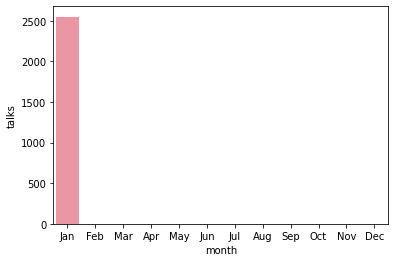

In [70]:
ted['month'] = ted['film_date'].apply(lambda x: month_order[int(str(x).split('-')[1]) - 1])
month_ted = ted['month'].value_counts().reset_index()
month_ted.columns = ['month', 'talks']
sns.barplot(x='month', y='talks', data=month_ted, order=month_order)

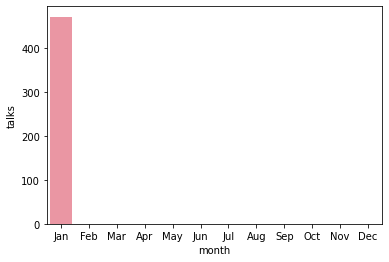

In [71]:
ted_x = ted[ted['event'].str.contains('TEDx')]
x_month_ted = ted_x['month'].value_counts().reset_index()
x_month_ted.columns = ['month', 'talks']
sns.barplot(x='month', y='talks', data=x_month_ted, order=month_order)

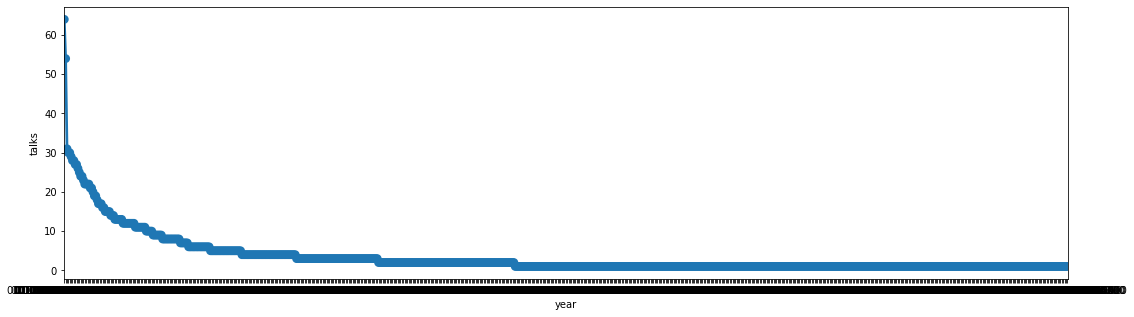

In [72]:
ted['year'] = ted['film_date'].apply(lambda x: str(x).split('-')[2])
year_ted = ted['year'].value_counts().reset_index()
year_ted.columns = ['year', 'talks']
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_ted)